In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nilearn

In [3]:
# Importing Dataset

from nilearn.datasets import fetch_abide_pcp
from nilearn.connectome import ConnectivityMeasure

data = fetch_abide_pcp(derivatives=['rois_dosenbach160'], SITE_ID=['NYU']) # Extracting fMRI data from NYU repository wrt AAL atlas

In [4]:
# Pre-processing the data

conn_est = ConnectivityMeasure(kind='correlation') # Connectivity Estimator
conn_matrices = conn_est.fit_transform(data['rois_dosenbach160'])
print(conn_matrices)

[[[ 1.          0.50309836  0.51199119 ...  0.38008603  0.29431919
    0.15357553]
  [ 0.50309836  1.          0.40098473 ...  0.32255811  0.27606994
    0.08527905]
  [ 0.51199119  0.40098473  1.         ...  0.05102346  0.10706281
    0.01105816]
  ...
  [ 0.38008603  0.32255811  0.05102346 ...  1.          0.38326502
    0.09960443]
  [ 0.29431919  0.27606994  0.10706281 ...  0.38326502  1.
    0.23017584]
  [ 0.15357553  0.08527905  0.01105816 ...  0.09960443  0.23017584
    1.        ]]

 [[ 1.          0.00880163  0.09434962 ...  0.18091446 -0.02005484
    0.29540624]
  [ 0.00880163  1.          0.26746685 ...  0.10393562  0.06961983
   -0.07915081]
  [ 0.09434962  0.26746685  1.         ...  0.00959987  0.04940362
   -0.09260341]
  ...
  [ 0.18091446  0.10393562  0.00959987 ...  1.          0.09142234
    0.03247246]
  [-0.02005484  0.06961983  0.04940362 ...  0.09142234  1.
   -0.12684462]
  [ 0.29540624 -0.07915081 -0.09260341 ...  0.03247246 -0.12684462
    1.        ]]

 [[ 

<Axes: >

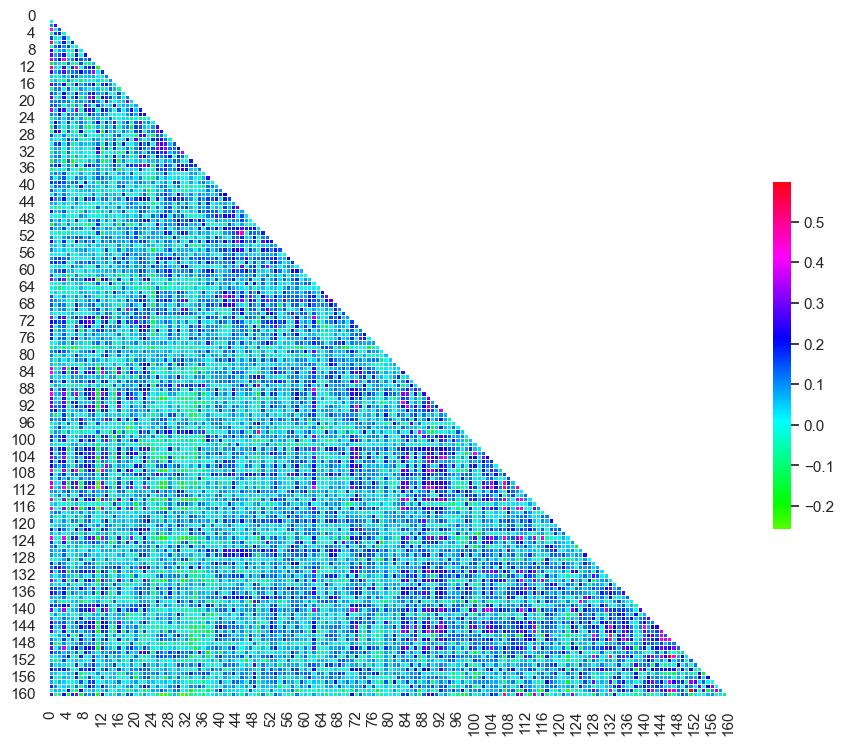

In [5]:
import seaborn as sns

corr = conn_matrices[1]
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='hsv', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
# shape of input

print(conn_matrices.shape)

(172, 161, 161)


In [7]:
# conn_matrices is a matrix that contains the correlation of different ROIs for each sample
# conn_matrices[i][j][k] -> correlation between ROI j and ROI k for subject i

# It is to note that connectivity matrices are symmetric matrices. Let flatten this matrix into a vector

sym_vec_matrices = [conn_matrix[np.triu_indices_from(conn_matrix, k=1)] for conn_matrix in conn_matrices]# Converting sym. matrix into vector
X=sym_vec_matrices
#print(X.shape)

In [8]:
y = data.phenotypic['DX_GROUP']
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [9]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = y.reshape(y.shape[0], 1)
y = ohe.fit_transform(y).toarray()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Neural network
model = Sequential()
#model.add(Dropout(0.8))

# Hidden Layer 1
model.add(Dense(64, input_dim=12880, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with dropout rate of 0.8

# Hidden Layer 2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) # Dropout layer with dropout rate of 0.8


# Output Layer
model.add(Dense(2, activation='sigmoid'))  # Use sigmoid activation for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
14/14 [==============================] - 2s 15ms/step - loss: 2.6183 - accuracy: 0.5839
Epoch 2/100
14/14 [==============================] - 0s 14ms/step - loss: 2.8517 - accuracy: 0.5109
Epoch 3/100
14/14 [==============================] - 0s 14ms/step - loss: 2.2962 - accuracy: 0.6204
Epoch 4/100
14/14 [==============================] - 0s 14ms/step - loss: 2.3072 - accuracy: 0.6715
Epoch 5/100
14/14 [==============================] - 0s 14ms/step - loss: 2.4753 - accuracy: 0.6861
Epoch 6/100
14/14 [==============================] - 0s 15ms/step - loss: 1.9764 - accuracy: 0.7810
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 1.5612 - accuracy: 0.8029
Epoch 8/100
14/14 [==============================] - 0s 14ms/step - loss: 1.2429 - accuracy: 0.8613
Epoch 9/100
14/14 [==============================] - 0s 14ms/step - loss: 2.1040 - accuracy: 0.7810
Epoch 10/100
14/14 [==============================] - 0s 14ms/step - loss: 0.9767 - accuracy: 0.9051

14/14 [==============================] - 0s 14ms/step - loss: 0.0712 - accuracy: 0.9927
Epoch 83/100
14/14 [==============================] - 0s 14ms/step - loss: 0.2368 - accuracy: 0.9781
Epoch 84/100
14/14 [==============================] - 0s 14ms/step - loss: 0.1704 - accuracy: 0.9854
Epoch 85/100
14/14 [==============================] - 0s 14ms/step - loss: 6.8197e-04 - accuracy: 1.0000
Epoch 86/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 87/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0380 - accuracy: 1.0000
Epoch 88/100
14/14 [==============================] - 0s 14ms/step - loss: 0.2357 - accuracy: 0.9708
Epoch 89/100
14/14 [==============================] - 0s 14ms/step - loss: 0.1457 - accuracy: 0.9781
Epoch 90/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 91/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0543 - accuracy: 0.9927

In [18]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
print(pred)
print(test)

2/2 [==============================] - 0s 6ms/step
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]


In [19]:
from sklearn.metrics import accuracy_score,classification_report
a = accuracy_score(pred,test)
print('Calssification report',classification_report(pred,test))
print('Accuracy is:', a*100)

Calssification report               precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.71      0.68      0.70        22

    accuracy                           0.63        35
   macro avg       0.61      0.61      0.61        35
weighted avg       0.63      0.63      0.63        35

Accuracy is: 62.857142857142854


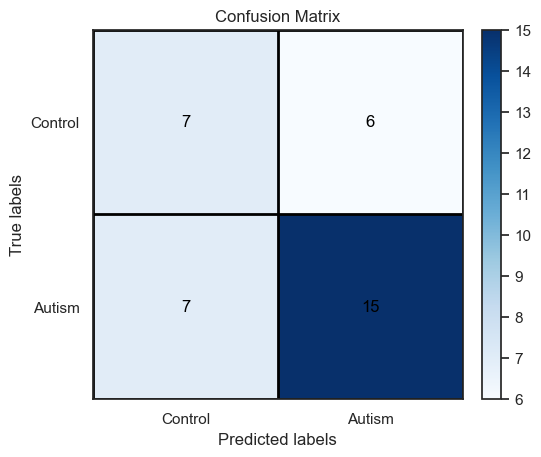

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming pred and test are your predicted and true labels

conf_matrix = confusion_matrix(pred, test)

fig, ax = plt.subplots()

# Plot the heatmap
im = ax.imshow(conf_matrix, cmap='Blues')

# Add text annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, f'{conf_matrix[i, j]}', ha='center', va='center', color='black', fontsize=12)

# Customize xticks and yticks
ax.set_xticks(np.arange(conf_matrix.shape[1]))
ax.set_yticks(np.arange(conf_matrix.shape[0]))
ax.set_xticklabels(['Control', 'Autism'])
ax.set_yticklabels(['Control', 'Autism'])

# Add grid lines
ax.set_xticks(np.arange(conf_matrix.shape[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(conf_matrix.shape[0] + 1) - 0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [66]:
y = data.phenotypic['DX_GROUP']
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [67]:
y[y == 2] = -1
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [68]:
from sklearn import svm
from sklearn.model_selection import cross_validate

# Now, as there are various hyperparameters associated with SVM, we will tune it to 
# see which configuration gives the best result

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

C = []
gamma = []

for i in range(-5, 16):
    C.append(2**i)

for i in range(-15, 4):
    gamma.append(2**i)

In [69]:
# Let's start with linear kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='linear', gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,...,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891
0.000061,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,...,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891
0.000122,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,...,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891
0.000244,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,...,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891
0.000488,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,...,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891
0.000977,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,...,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891
0.001953,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,...,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891
0.003906,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,...,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891
0.007812,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,...,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891
0.015625,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,...,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891,0.586891


In [71]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [72]:
def Plot3D(df, title):
    X = []
    Y = []
    Z = []
    for i in range(-5, 16):
        for j in range(-15, 4):
            x = 2 ** i
            y = 2 ** j
            z = df[x][y]
            X.append(i)
            Y.append(j)
            Z.append(z)
    newdf = pd.DataFrame({'x': X, 'y': Y, 'z': Z}, index=range(len(X)))
    fig = plt.figure(dpi=400)
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('C (in log scale)')
    ax.set_ylabel('Gamma (in log scale)')
    ax.set_zlabel('Accuracy observed')
    ax.set_title(title)
    ax.plot_trisurf(newdf.x, newdf.y, newdf.z, cmap=cm.jet, linewidth=0.2)
    plt.show()


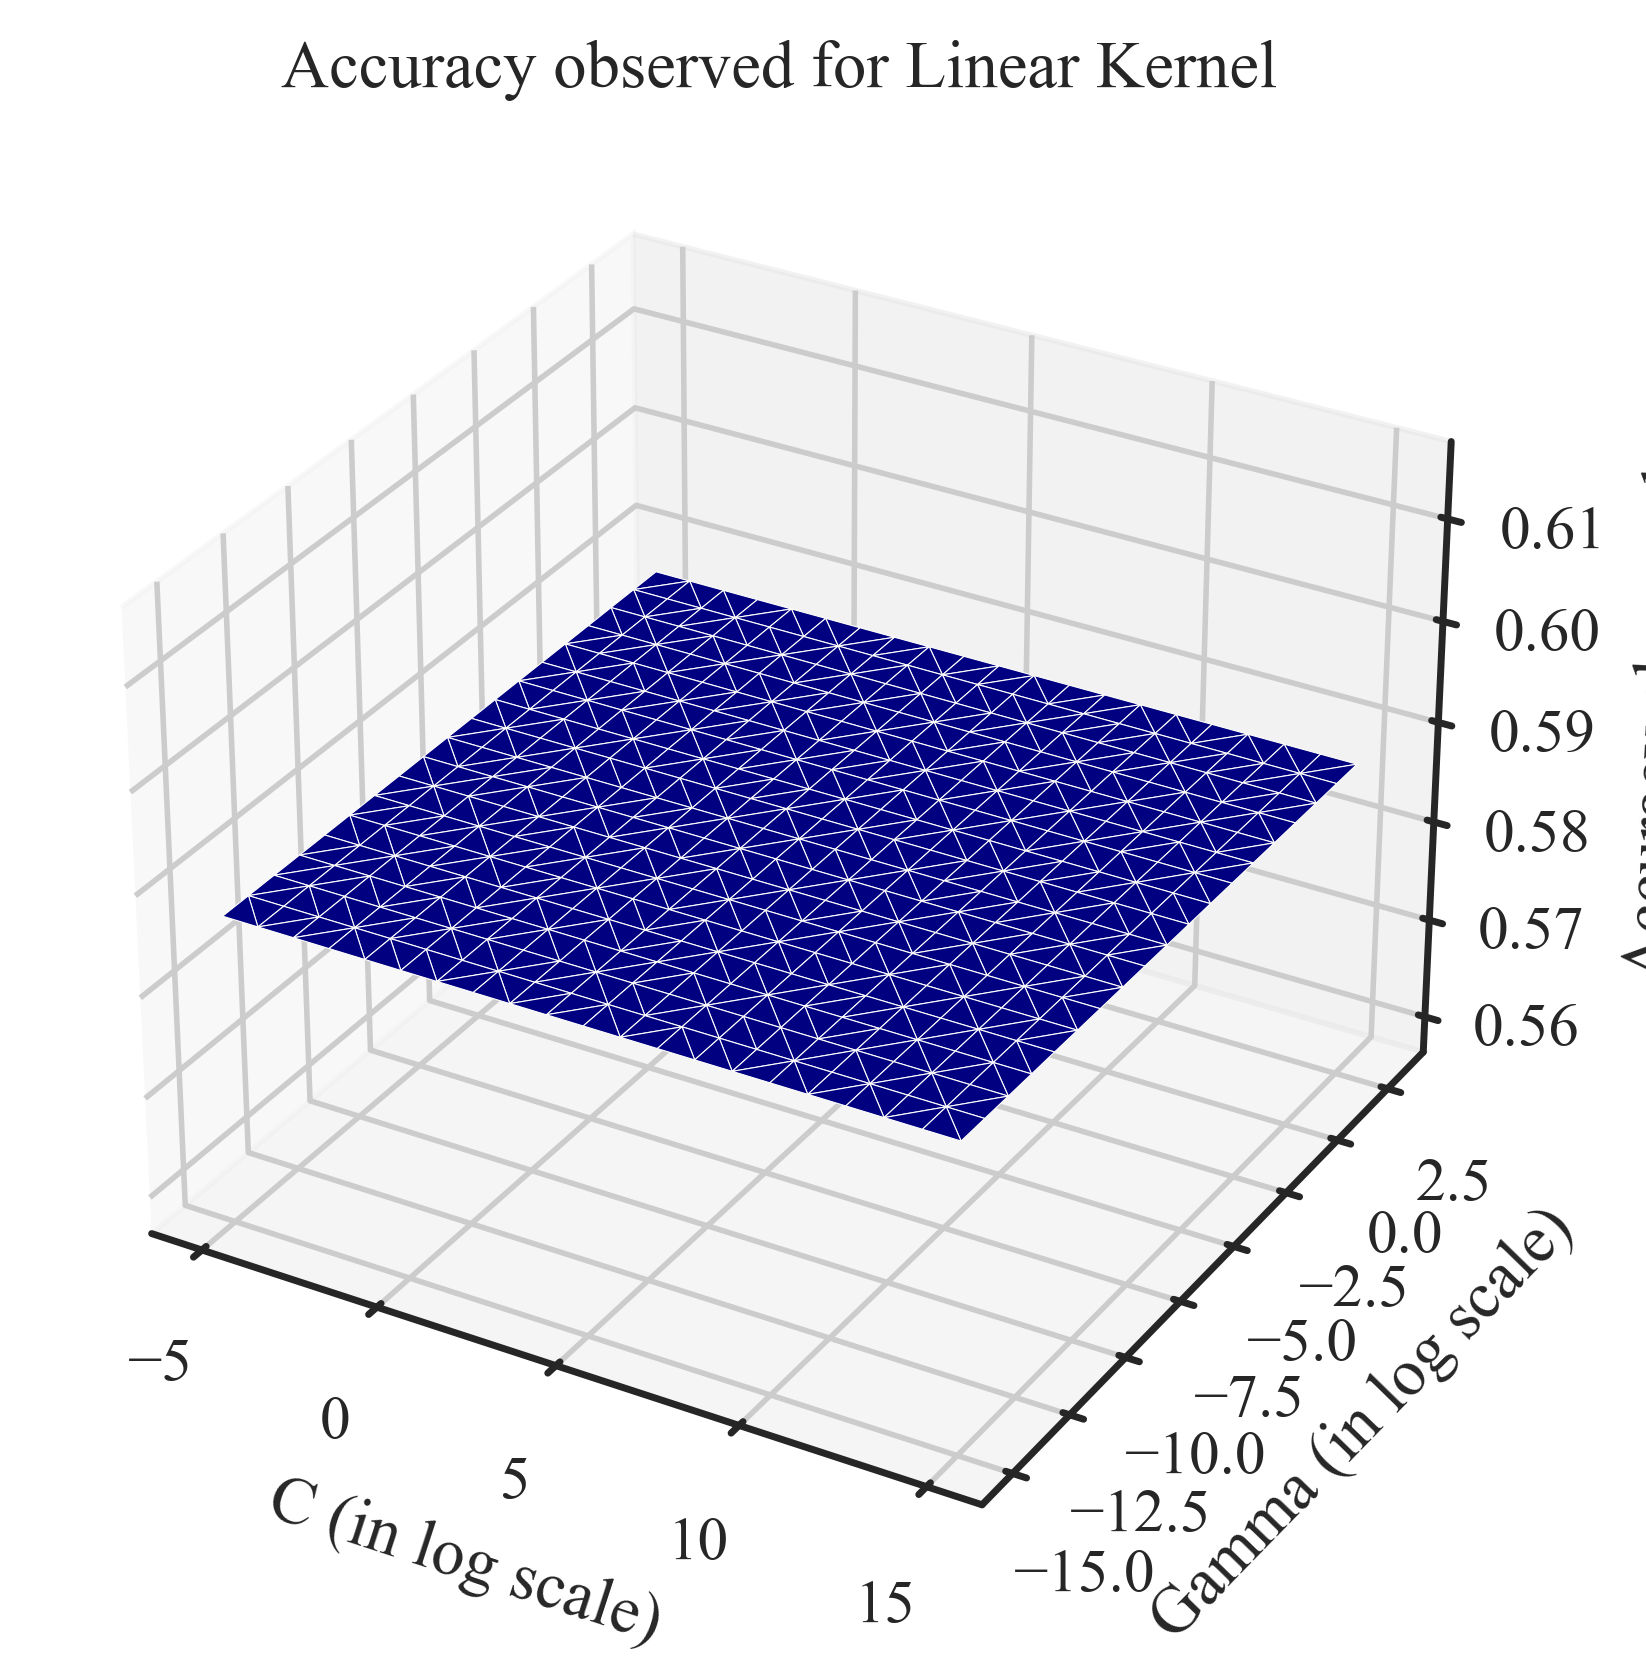

In [73]:
Plot3D(df, 'Accuracy observed for Linear Kernel')

In [74]:
# Using radial kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='rbf', gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.465546,0.465546,0.465546,0.494958,0.535294,0.512101,0.569916,0.546218,0.551933,0.551933,...,0.551933,0.551933,0.551933,0.551933,0.551933,0.551933,0.551933,0.551933,0.551933,0.551933
0.000061,0.471429,0.471429,0.494958,0.494958,0.535294,0.523529,0.552101,0.552101,0.552101,0.552101,...,0.552101,0.552101,0.552101,0.552101,0.552101,0.552101,0.552101,0.552101,0.552101,0.552101
0.000122,0.494958,0.471429,0.465546,0.489076,0.465546,0.535126,0.575462,0.575462,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.000244,0.512605,0.512605,0.489076,0.489076,0.465546,0.575462,0.575462,0.575462,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462
0.000488,0.512605,0.512605,0.512605,0.512605,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.000977,0.512605,0.512605,0.512605,0.489076,0.489076,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.001953,0.465546,0.465546,0.465546,0.489076,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.003906,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.007812,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
0.015625,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748


In [75]:
df.describe()

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.474834,0.473596,0.473286,0.476073,0.474126,0.562760,0.569429,0.568182,0.568483,0.568483,...,0.568483,0.568483,0.568483,0.568483,0.568483,0.568483,0.568483,0.568483,0.568483,0.568483
std,0.018111,0.017451,0.016175,0.015007,0.022217,0.017893,0.004563,0.007007,0.006072,0.006072,...,0.006072,0.006072,0.006072,0.006072,0.006072,0.006072,0.006072,0.006072,0.006072,0.006072
min,0.465546,0.465546,0.465546,0.465546,0.465546,0.512101,0.552101,0.546218,0.551933,0.551933,...,0.551933,0.551933,0.551933,0.551933,0.551933,0.551933,0.551933,0.551933,0.551933,0.551933
25%,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
50%,0.465546,0.465546,0.465546,0.465546,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
75%,0.468487,0.468487,0.465546,0.489076,0.465546,0.569748,0.569748,0.569748,0.569748,0.569748,...,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748,0.569748
max,0.512605,0.512605,0.512605,0.512605,0.535294,0.575462,0.575462,0.575462,0.575462,0.575462,...,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462,0.575462


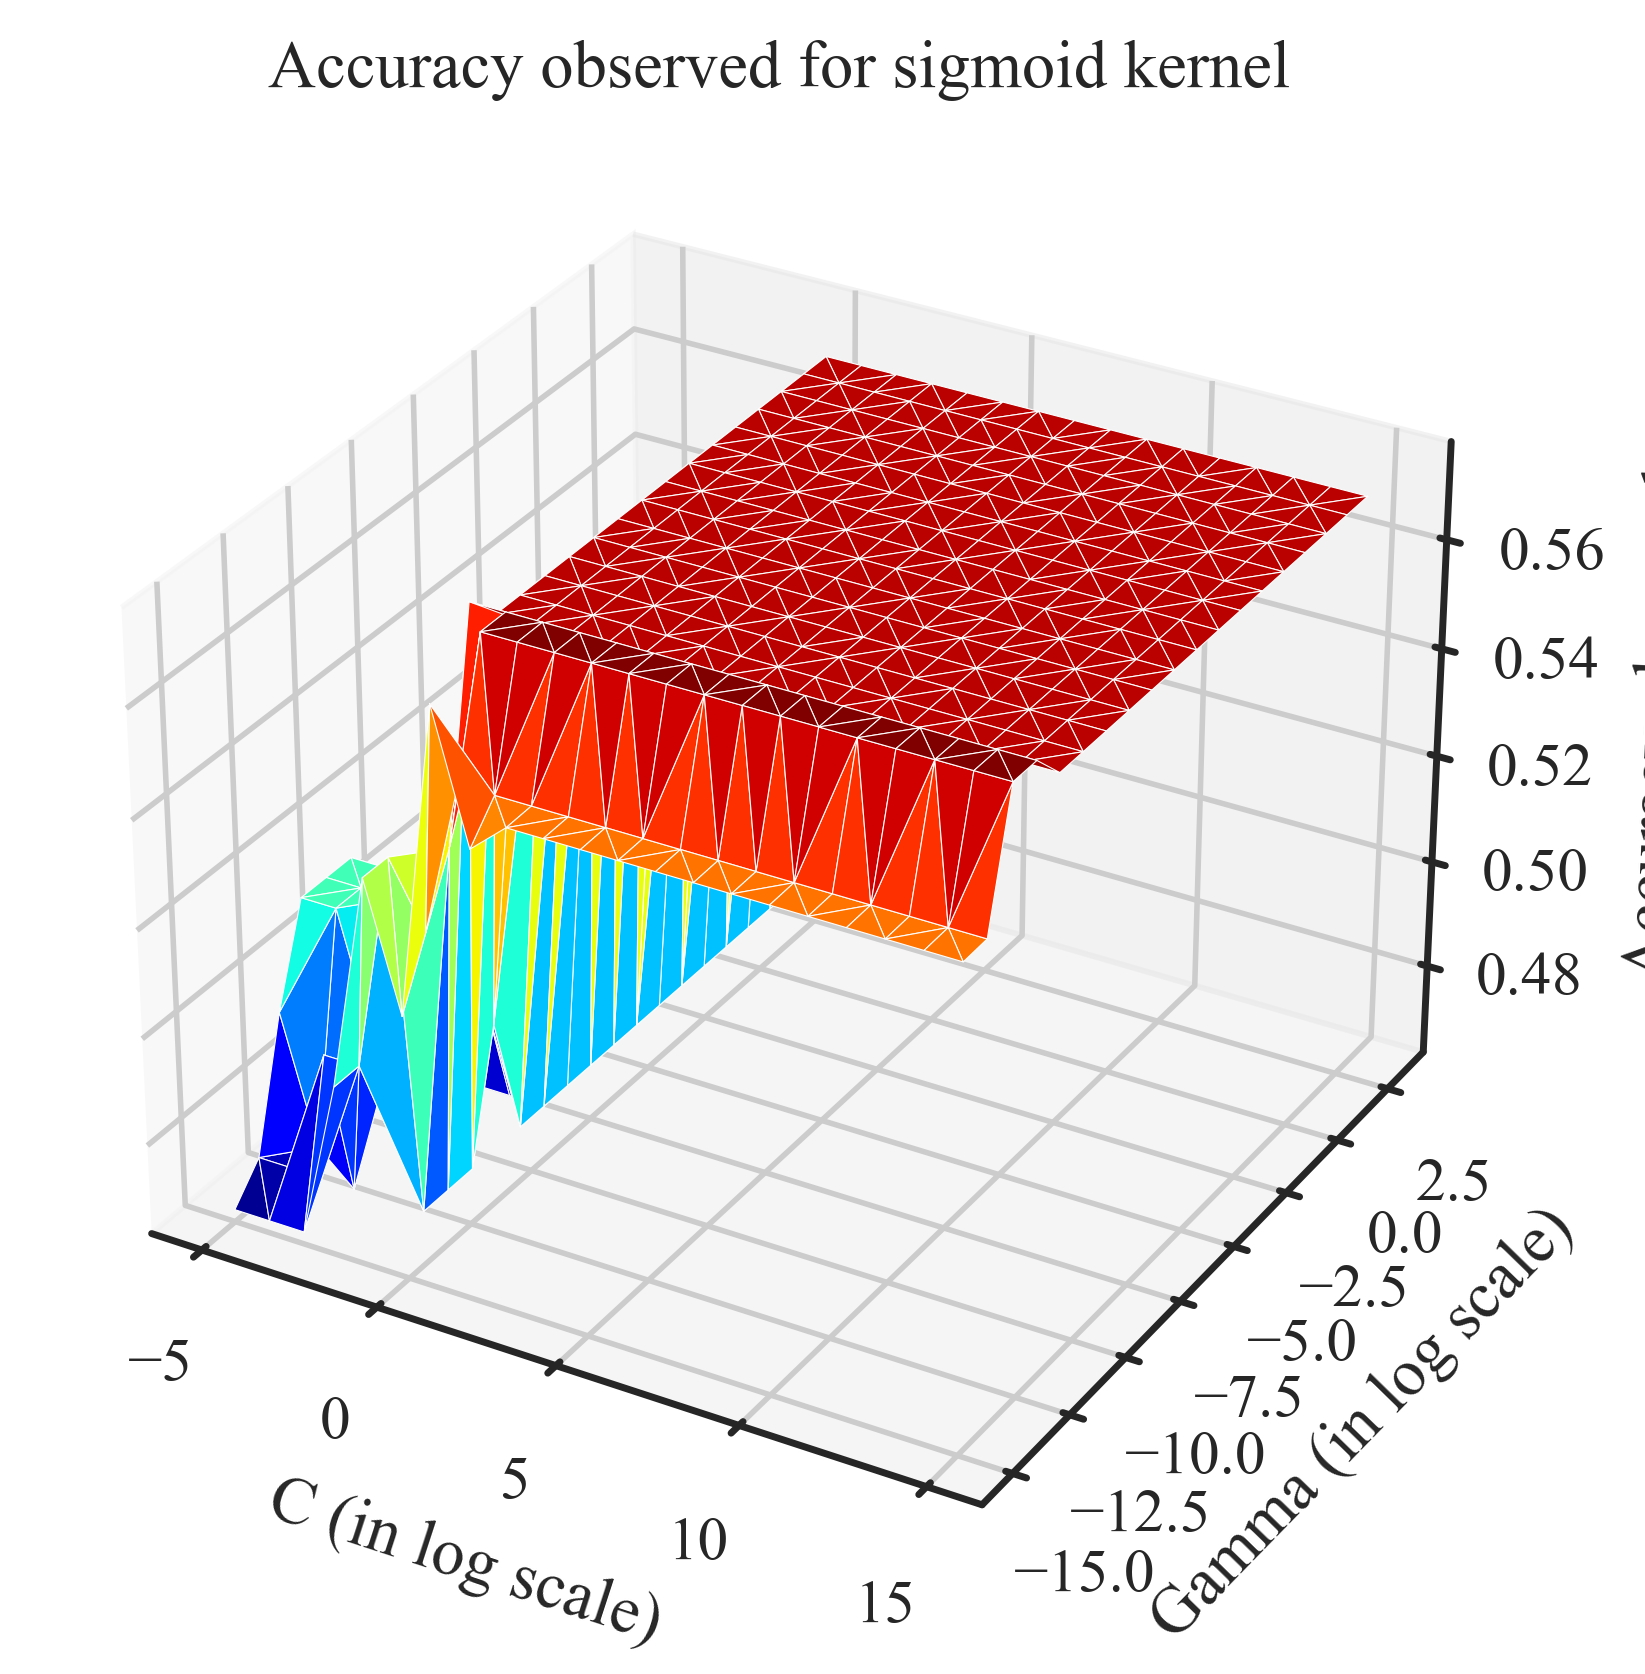

In [76]:
Plot3D(df, 'Accuracy observed for sigmoid kernel')

In [77]:
# Using quadratic kernel

acc = dict()

for c in C:
    cur_acc = dict()
    for g in gamma:
        clf = svm.SVC(C=c, kernel='poly', degree=2, gamma=g, tol=1e-10, class_weight='balanced')
        cv_results = cross_validate(clf, X, y, cv=5)
        score = np.mean(cv_results['test_score'])
        cur_acc[g] = score
    acc[c] = cur_acc

df = pd.DataFrame(acc)
df

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
0.000031,0.465546,0.465546,0.541176,0.581345,0.581345,0.575462,0.569580,0.563697,0.557815,0.575294,...,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008
0.000061,0.541176,0.581345,0.581345,0.575462,0.569580,0.563697,0.557815,0.575294,0.581008,0.581008,...,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008
0.000122,0.581345,0.575462,0.569580,0.563697,0.557815,0.575294,0.581008,0.581008,0.581008,0.581008,...,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008
0.000244,0.569580,0.563697,0.557815,0.575294,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,...,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008
0.000488,0.557815,0.575294,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,...,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008
0.000977,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,...,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008
0.001953,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,...,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008
0.003906,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,...,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008
0.007812,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,...,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008
0.015625,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,...,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008


In [78]:
df.describe()

,0.03125,0.06250,0.12500,0.25000,0.50000,1.00000,2.00000,4.00000,8.00000,16.00000,...,64.00000,128.00000,256.00000,512.00000,1024.00000,2048.00000,4096.00000,8192.00000,16384.00000,32768.00000
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01
mean,0.571031,0.573445,0.577107,0.579522,0.579204,0.579505,0.579186,0.579797,0.579788,0.580708,...,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01
std,0.027583,0.026466,0.010451,0.004224,0.005806,0.004217,0.005800,0.004112,0.005321,0.001311,...,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16,1.140646e-16
min,0.465546,0.465546,0.541176,0.563697,0.557815,0.563697,0.557815,0.563697,0.557815,0.575294,...,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01
25%,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,...,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01
50%,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,...,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01
75%,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,0.581008,...,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01
max,0.581345,0.581345,0.581345,0.581345,0.581345,0.581008,0.581008,0.581008,0.581008,0.581008,...,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01,5.810084e-01


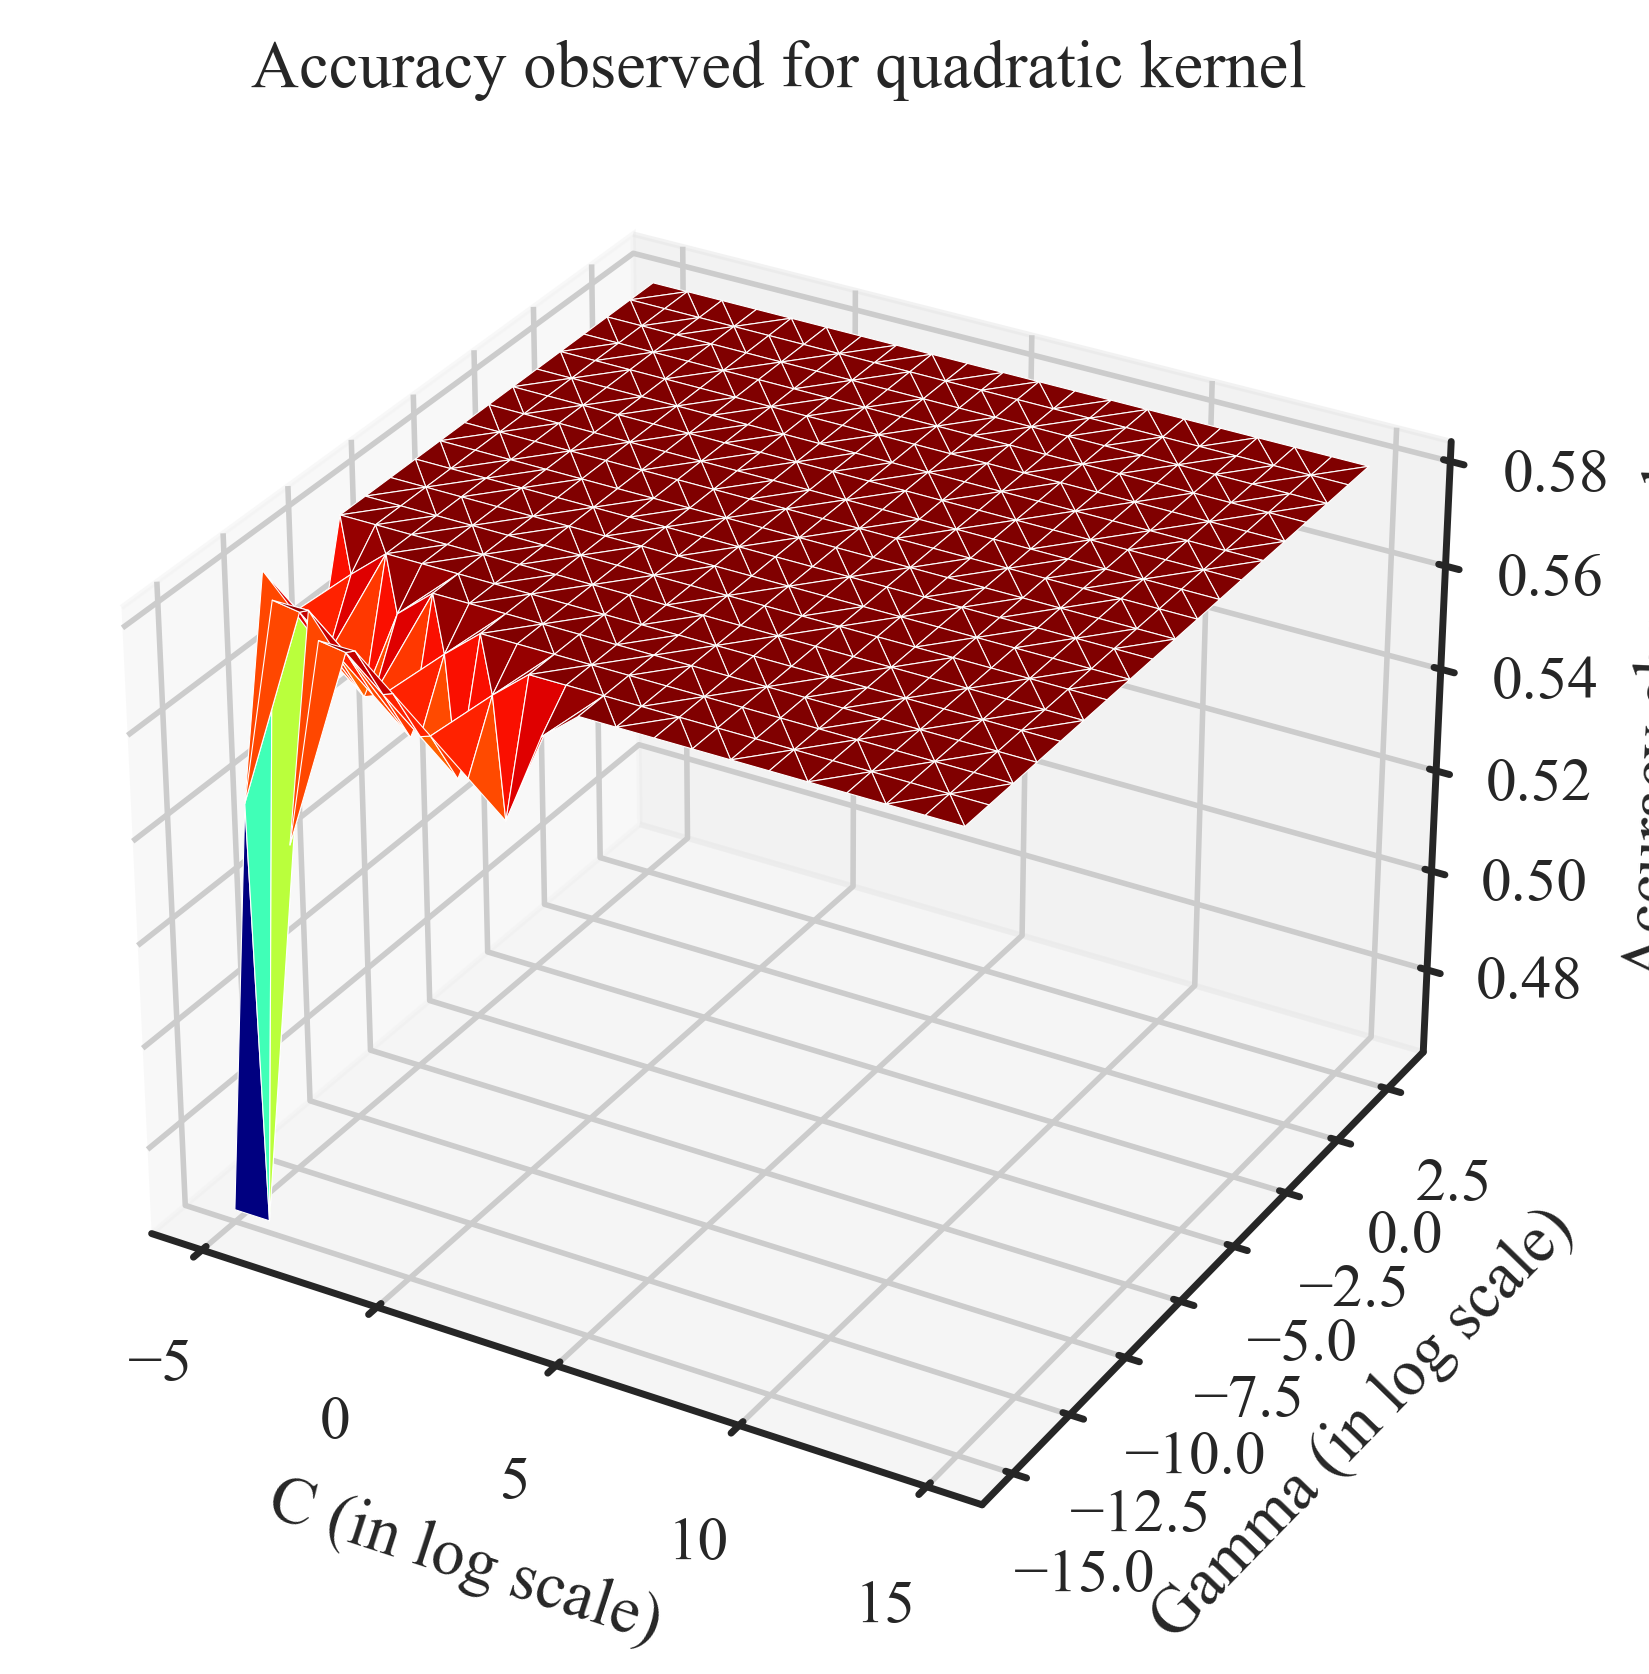

In [79]:
Plot3D(df, 'Accuracy observed for quadratic kernel')